#### Walmart Sales Analysis

###### DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

###### Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

###### Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13



In [1]:
# Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler # for normalization
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data and check first 5 records

df = pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.shape

(6435, 8)

 - dataset contains 6k records and 8 features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


 - Most of the Features are numeric in nature except Date

In [5]:
# check if data contains any blank values

df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# Check the description of data
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,25-11-2011,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


- Looks there are some extreme values in temprature- 100, CPI -227 and Unemployment 14.31

In [7]:
# Converting Date object type to Date type and creating other date features (Day,month,WeekNo,Qtr,Year)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['WeekNo'] = df['Date'].dt.week
df['Qtr'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year


In [8]:
print('Data available from : ',min(df['Date']))
print('Till date: ',max(df['Date']))


Data available from :  2010-02-05 00:00:00
Till date:  2012-10-26 00:00:00


In [9]:
# First converting holidays into corresponding date format.

super_bowl_df = ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']
labour_day_df = ['10-09-2010', '9-09-2011', '7-09-2012', '6-09-2013']
thanksgiving_df =['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
christmas_df= ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']

super_bowl_df = pd.to_datetime(pd.Series(super_bowl_df), format='%d-%m-%Y')
labour_day_df = pd.to_datetime(pd.Series(labour_day_df), format='%d-%m-%Y')
thanksgiving_df = pd.to_datetime(pd.Series(thanksgiving_df), format='%d-%m-%Y')
christmas_df = pd.to_datetime(pd.Series(christmas_df), format='%d-%m-%Y')

#df['is_super'] = df.Date.isin(super_bowl_df).astype(int)
#df['is_labour'] = df.Date.isin(labour_day_df).astype(int)
#df['is_thanksgiving'] = df.Date.isin(thanksgiving_df).astype(int)
#df['is_christmas'] = df.Date.isin(christmas_df).astype(int)

super_bowl_yearly = df.loc[df.Date.isin(super_bowl_df)]
labour_day_yearly = df.loc[df.Date.isin(labour_day_df)]
thanksgiving_yearly = df.loc[df.Date.isin(thanksgiving_df)]
christmas_yearly = df.loc[df.Date.isin(christmas_df)]

In [10]:
print('Data available from : ',min(df['Date']))
print('Till date: ',max(df['Date']))



Data available from :  2010-02-05 00:00:00
Till date:  2012-10-26 00:00:00


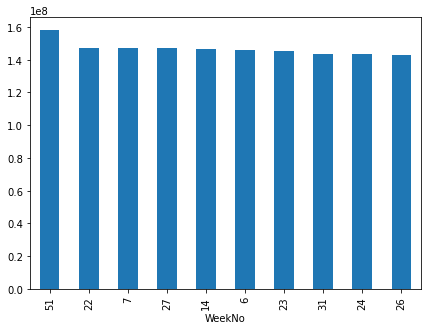

In [11]:
#### Top 10 weeks which have highest weekly sales
df.groupby('WeekNo')['Weekly_Sales'].sum().sort_values(ascending=False).head(10).plot.bar(figsize=(7,5))
plt.show()

- Highest sales was in Week No. 51

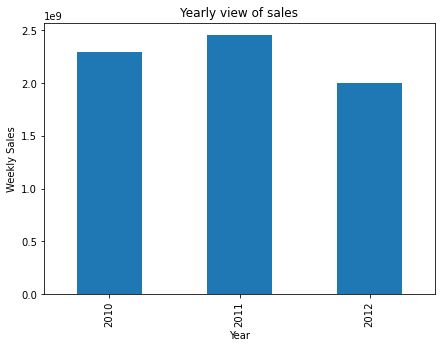

In [12]:
#yearly sales unit
plt.figure(figsize=(7,5))
df.groupby(['Year'])['Weekly_Sales'].sum().plot.bar()
plt.xlabel("Year")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")
plt.show()


 - Highest sales was in 2011 year

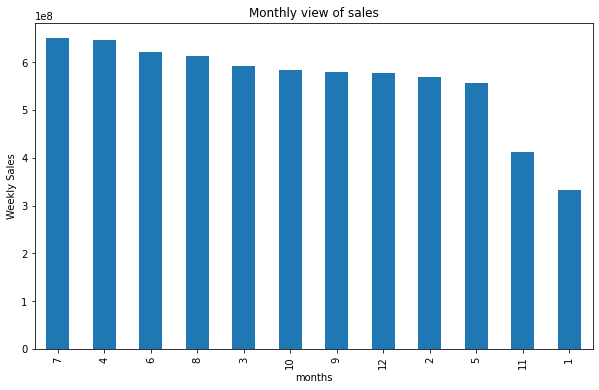

In [13]:
# Monthly view of sales overall
plt.figure(figsize=(10,6))
df.groupby(['Month'])['Weekly_Sales'].sum().sort_values(ascending=False).plot.bar()
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

 - Overall Jul sales was the highest amongst all month 

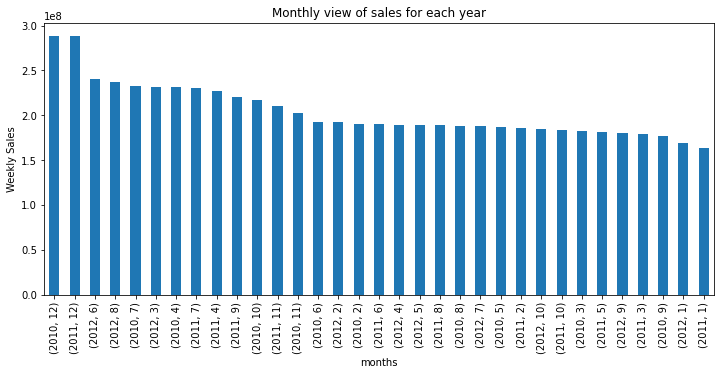

In [14]:
#monthly sales unit for each year
plt.figure(figsize=(12,5))
df.groupby(['Year','Month'])['Weekly_Sales'].sum().sort_values(ascending=False).plot.bar()
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales for each year")

plt.show()


 - Dec was the highest sales month
 - Jan was lowest sales month.

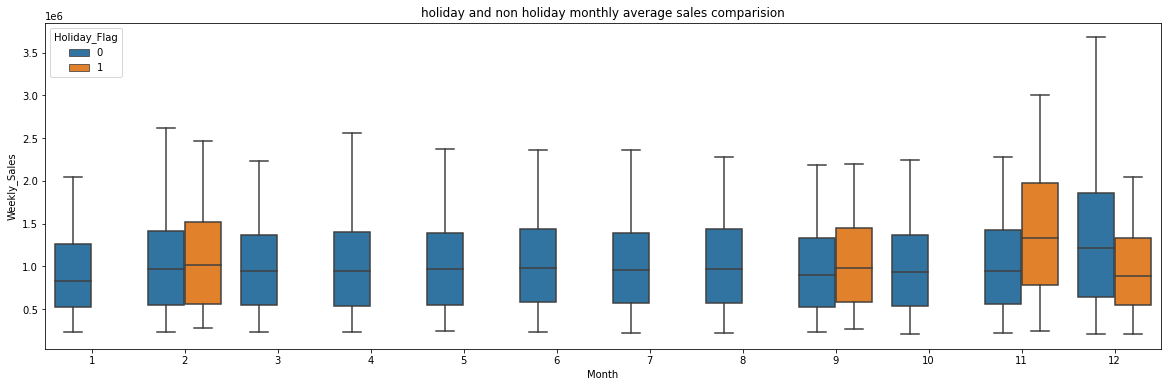

In [15]:
#Holiday and Non Holiday Monthly sales analysis
plt.figure(figsize = (20,6))
plt.title ('holiday and non holiday monthly average sales comparision')
fig = sns.boxplot(x = 'Month'
                  ,y = 'Weekly_Sales'
                  ,data = df[['Month','Weekly_Sales','Holiday_Flag']]
                  ,showfliers = False
                  ,hue = 'Holiday_Flag')


 - Mean holiday sales in Nov was the highest 
  - Mean non holiday sales in Dec is highest

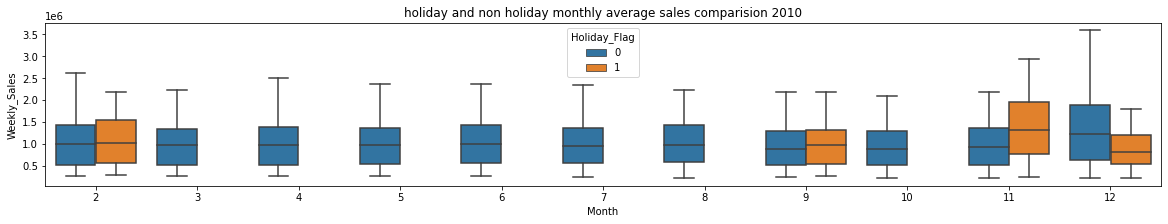

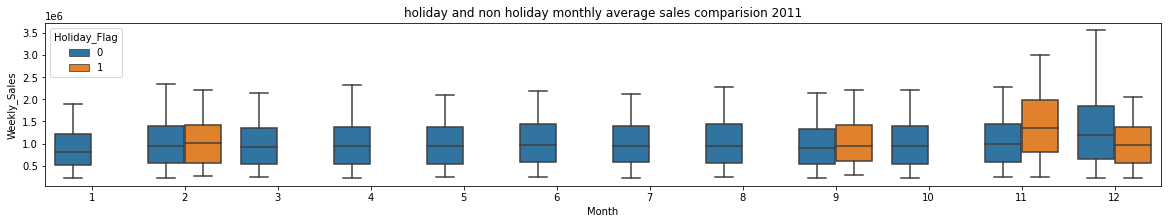

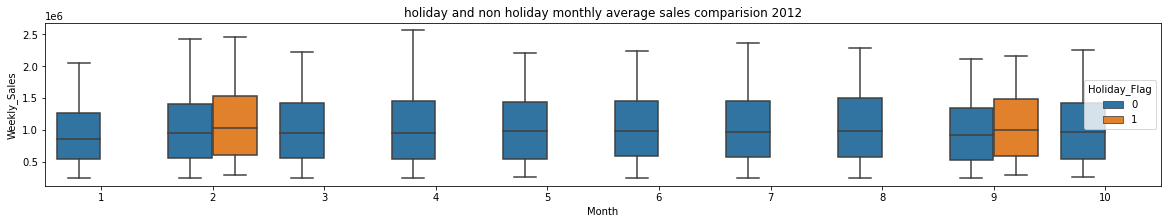

In [16]:
#Yearly holiday and non holiday sales comparision

years = df['Year'].unique()
for i in years:
    year = i
    year_df = df.loc[df['Year']==year]

    plt.figure(figsize = (20,3))
    plt.title ('holiday and non holiday monthly average sales comparision '+(year).astype(str))
    fig = sns.boxplot(x = 'Month',y = 'Weekly_Sales',data = year_df[['Month','Weekly_Sales','Holiday_Flag']]
                  ,showfliers = False,hue = 'Holiday_Flag')

    plt.show()

 - 2010
     - In Dec there was a lowest holiday sales season but highest non holiday sales. 
     - In Sep monthly sales of Labour day and non holiday was almost same.
     - Holiday sales i.e. thanksgiving sale was highest in Nov  
 - 2011
    - In Dec there was a lowest holiday sales season but highest non holiday sales. 
    - In Feb Superbowl holiday sales and non holiday sales was almost same
 - 2012
    - Non holiday sales was more in Jun
    - Super bowl holiday sales was more in Fel 

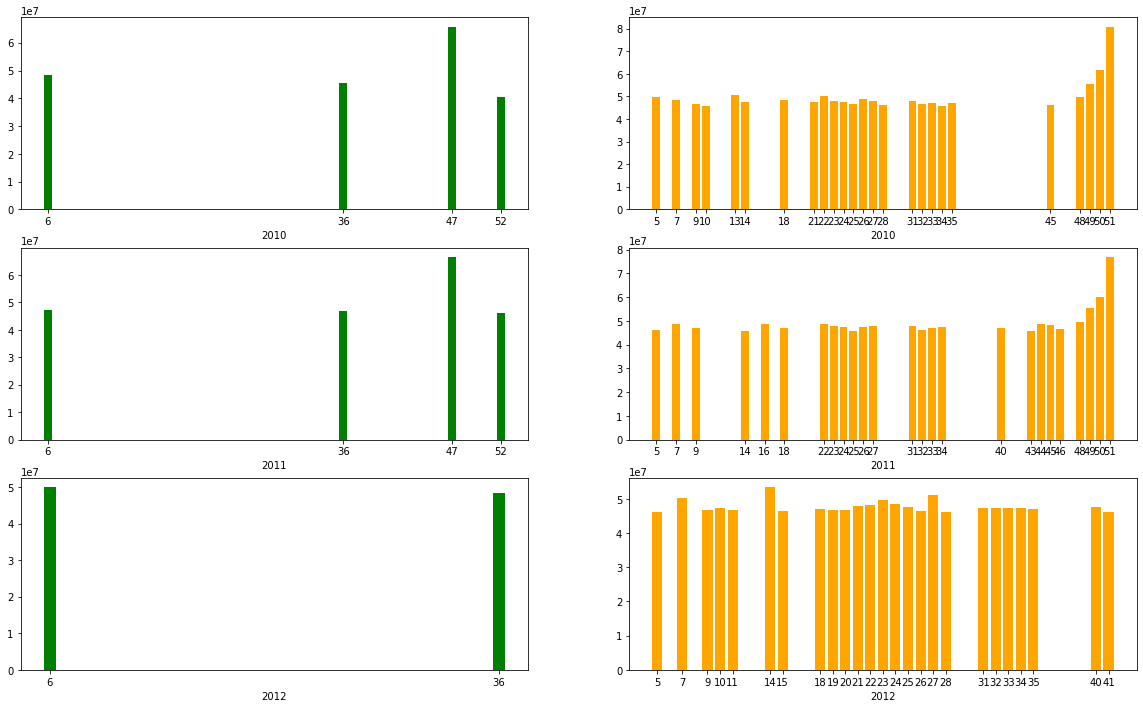

In [17]:
#### comparision of holiday weekly sales against top 10 non holiday weekly sales

years = df['Year'].unique()
from matplotlib import gridspec

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

i = 0

for yr in years:
    year = yr
    
    year_df = df.loc[(df['Year']==year) & (df['Holiday_Flag']==1)]
    h1_df = year_df.groupby('WeekNo')['Weekly_Sales'].sum().sort_values(ascending=False)
    x1 = h1_df.index
    y1 = h1_df.values
    ax[i][0].bar(x1, y1,color='green')
    ax[i][0].set_xticks(x1)
    ax[i][0].set_xlabel(year)

    year_df = df.loc[(df['Year']==year) & (df['Holiday_Flag']==0)]
    h0_df =  year_df.groupby('WeekNo')['Weekly_Sales'].sum().sort_values(ascending=False).head(25)
    
    x2 = h0_df.index
    y2 = h0_df.values
    ax[i][1].bar(x2, y2,color='orange')
    ax[i][1].set_xticks(x2)
    ax[i][1].set_xlabel(year)
    
    i = i  + 1 
plt.show()


 #### Observation
  - Holidays
       - Super Bowl (week no.6)
           - The sales trend in super_bowl week and before and after week looks almost similar.
           - Approximately same super bowl weekly sales in all three years. (2010,2011,2012)
       - Labour Day (week no.36)
           - Approximately same labour day weekly sales in all three years. (2010,2011,2012)
           - The sales trend in labour week and before 4 weeks almost similar
       - Thanksgiving (week no.47)
           - Data is available for 2 yrs (2010,2011) and in both years, this holiday sales gives highest weekly sales amongst 
             all holidays.
           - After thanksgiving week next 4 weeks (week no.48- 51), the holiday sales is high.
       - Christmas (week no. 52)
            - The weekly sale for this holiday sales event is the lowest in all holiday events.
            - But interstingly the week before christmas sale is the year's highest sales week.
              People purchased more before christmas holiday.

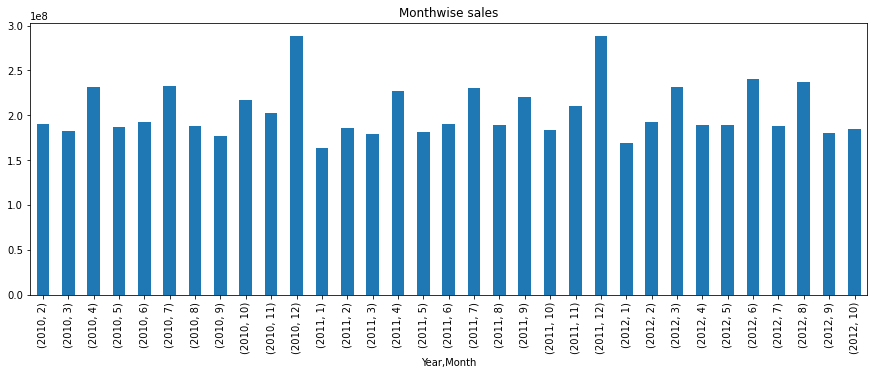

In [18]:
# Monthwise yearly sale.
plt.figure(figsize=(15,5))
dfweekdata = df.groupby(['Year','Month'])['Weekly_Sales'].sum()
dfweekdata.plot(kind='bar', stacked=True)
plt.title('Monthwise sales')
plt.show()

 - Highest sales was in Dec and lowest was in Jan.

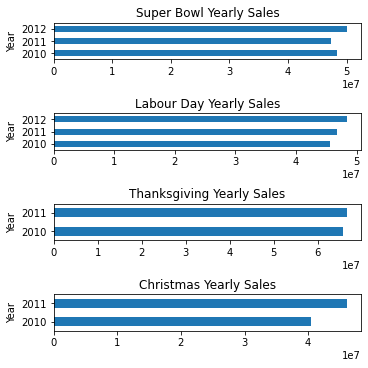

In [19]:
# Holiday yearly sales
super_bowl_yearly = df.loc[df.Date.isin(super_bowl_df)].groupby('Year')['Weekly_Sales'].sum()
labour_day_yearly = df.loc[df.Date.isin(labour_day_df)].groupby('Year')['Weekly_Sales'].sum()
thanksgiving_yearly = df.loc[df.Date.isin(thanksgiving_df)].groupby('Year')['Weekly_Sales'].sum()
christmas_yearly = df.loc[df.Date.isin(christmas_df)].groupby('Year')['Weekly_Sales'].sum()

fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,figsize=(5, 5),constrained_layout = True)
super_bowl_yearly.plot(kind='barh', y="Sales", x="Year", ax=ax0)
ax0.title.set_text('Super Bowl Yearly Sales')

labour_day_yearly.plot(kind='barh', y="Sales", x="Year", ax=ax1)
ax1.title.set_text('Labour Day Yearly Sales')

thanksgiving_yearly.plot(kind='barh', y="Sales", x="Year", ax=ax2)
ax2.title.set_text('Thanksgiving Yearly Sales')

christmas_yearly.plot(kind='barh', y="Sales", x="Year", ax=ax3)
ax3.title.set_text('Christmas Yearly Sales')
plt.show()



 - As Thanskgiving and Chrismas one year 2012 sales data is not available so based on available data Superbowl holidays
   yearly sales is more than other holidays yearly sale

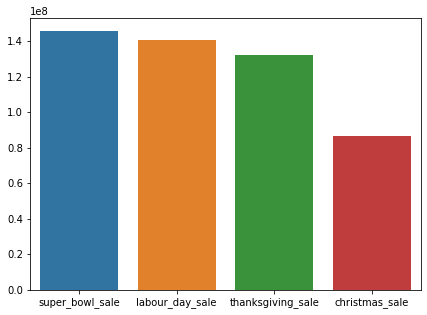

In [20]:
#### Holiday sales overall

plt.figure(figsize=(7,5))

sns.barplot(x=list(['super_bowl_sale','labour_day_sale','thanksgiving_sale','christmas_sale']),
                   y=list([super_bowl_yearly.sum(),labour_day_yearly.sum(),thanksgiving_yearly.sum(),christmas_yearly.sum()]))
plt.show()


-  Super Bowl sale was the highest and Christmas was the lowest in holiday seasons.

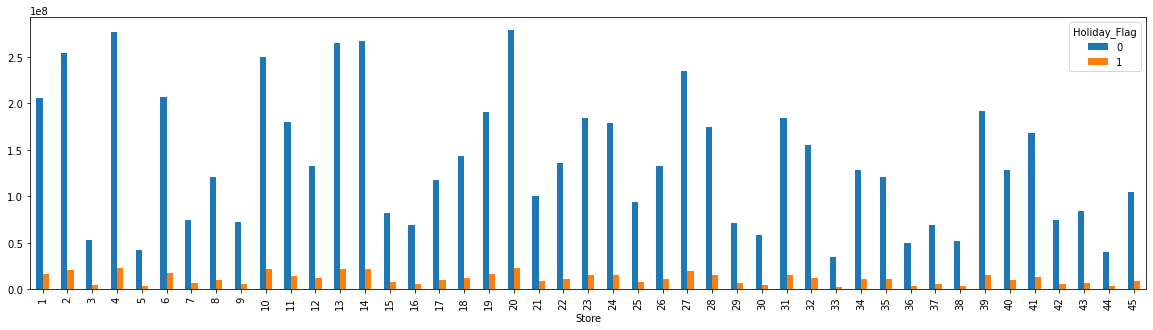

In [21]:
#Holiday and Non-holiday storewise analysis

df.groupby(['Store','Holiday_Flag'])['Weekly_Sales'].sum().unstack().plot.bar(figsize=(20,5))
plt.show()

 - Store 20 has highest sales while Store 33 has lowest sale.

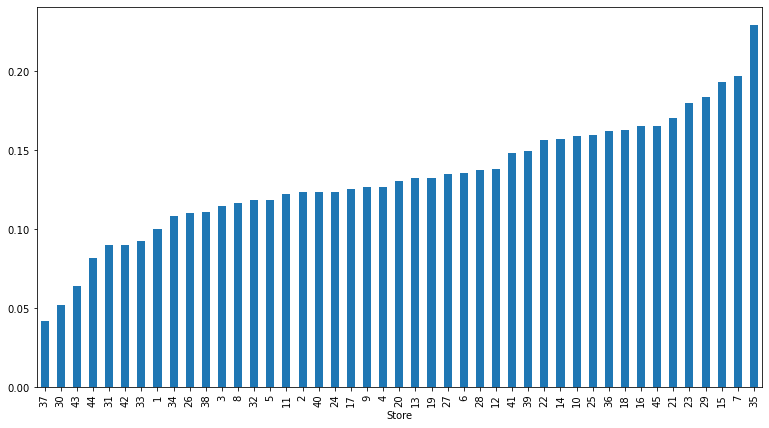

In [22]:
#Checking the coefficient of mean to standard deviation
plt.figure(figsize=(13,7))
coef_mean_std = ((df.groupby(['Store'])['Weekly_Sales'].std())/(df.groupby(['Store'])['Weekly_Sales'].mean())).sort_values(ascending=True)
coef_mean_std.plot.bar()
plt.show()

 - Store 37 has low coefficent of variations and Store 35 has more coefficent of variations.

In [23]:
# Some holidays have a negative impact on sales. Find out holidays which have higher sales 
# than the mean sales in non-holiday season for all stores together

non_holiday_stores = df.loc[df['Holiday_Flag']==0]
non_holiday_mean_sales = non_holiday_stores['Weekly_Sales'].mean()
non_holiday_mean_sales 
holiday_more_sales = df.loc[(df['Weekly_Sales']>non_holiday_mean_sales) & (df['Holiday_Flag']==1) ]
holiday_more_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,WeekNo,Qtr,Year
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,6,1,2010
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,10,9,36,3,2010
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,26,11,47,4,2010
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,31,12,52,4,2010
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,11,2,6,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,30,12,52,4,2011
5825,41,2012-02-10,1238844.56,1,22.00,3.103,196.919506,6.589,10,2,6,1,2012
5855,41,2012-09-07,1392143.82,1,67.41,3.596,198.095048,6.432,7,9,36,3,2012
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,26,11,47,4,2010


- Almost half of the time 220 records out of 450, the holiday sales is more than the non holiday average sale. 

In [24]:
#All stores data stored in Store column, Store is categorical data, so convert the Store number to features

z= pd.get_dummies(df['Store']) #One hot encoding the store 
df = df.join(z)

In [25]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,...,36,37,38,39,40,41,42,43,44,45
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,...,0,0,0,0,0,0,0,0,0,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,...,0,0,0,0,0,0,0,0,0,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,...,0,0,0,0,0,0,0,0,0,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,...,0,0,0,0,0,0,0,0,0,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Weekly Sales is a target variable

y = df['Weekly_Sales']

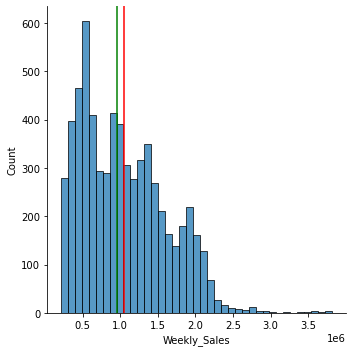

In [27]:
#### First check the distribution of target data
sns.displot(y)
plt.axvline(x=y.mean(),color='red')
plt.axvline(x=y.median(),color='green')

plt.show()

 - Weekly sales distribution is slightly skewed positively.

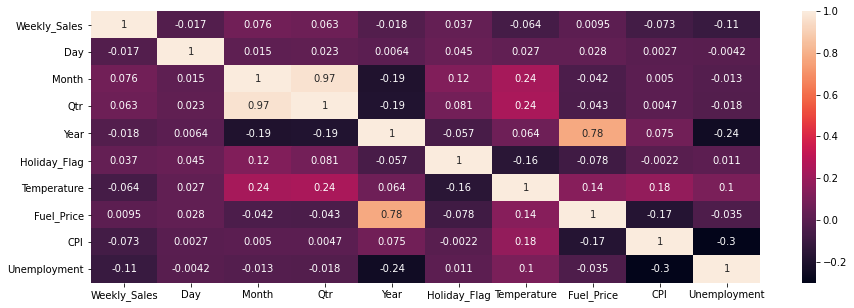

In [28]:
#X = df.drop(columns=['Date','Weekly_Sales','Store','Month','Qtr','Year','Day','Temperature','Fuel_Price','CPI','Holiday_Flag'],axis=1)

# Check the correlation of Weekly sales with some features
corrdata = df[['Weekly_Sales','Day','Month','Qtr','Year','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
plt.figure(figsize=(15,5))
sns.heatmap(corrdata.corr(),annot=True)
plt.show()

 - There is very less correlation of these features with Weekly Sales. So it is better to drop them.

In [29]:
drop_col = ['Weekly_Sales','Store','Date','Day','Month','Qtr','Year','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']

X = df.drop(columns=drop_col,axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
# For statistics
import statsmodels.api as si
mod=si.OLS(y_train,X_train)
result=mod.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1362.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:05:35   Log-Likelihood:                -68870.
No. Observations:                5148   AIC:                         1.378e+05
Df Residuals:                    5102   BIC:                         1.381e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WeekNo      3117.7463    154.904     20.127      0.0

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score

LR = LinearRegression()
DR = DecisionTreeRegressor()
RF = RandomForestRegressor()
Bag = BaggingRegressor()
ET = ExtraTreeRegressor()
GDB = GradientBoostingRegressor()

ml_model = [LR,DR,RF,Bag,ET,GDB]

for i in ml_model:
    count = 0
    accuracy = cross_val_score(estimator=i, X=X_train, y=y_train, cv=10)

    print('accuracy score of {} is {}'.format(i,accuracy.mean()))
    

accuracy score of LinearRegression() is 0.921440685700136
accuracy score of DecisionTreeRegressor() is 0.9480604910356976
accuracy score of RandomForestRegressor() is 0.9515926889778511
accuracy score of BaggingRegressor() is 0.948861789901098
accuracy score of ExtraTreeRegressor() is 0.9450507296436179
accuracy score of GradientBoostingRegressor() is 0.8449142053805637


In [32]:
# Random Forest performance is the highest one in all available regression models.

In [33]:
# We will cross verify the model performance with test data.

import math

models = {'LR':LR,'DR':DR,'RF':RF,'Bag':Bag,'ET':ET,'GDB':GDB}
    
for i in models:
    print('---------',i)
    models[i].fit(X_train,y_train)
    y_pred = models[i].predict(X_test)

    r2score = round(r2_score(y_test, y_pred)*100,2)
    MSE = mean_squared_error(y_test, y_pred)

    print('r2_Score :',(r2score.mean()))
    print('RMSE :',(math.sqrt(MSE.mean())))

--------- LR
r2_Score : 91.91
RMSE : 161467.3933401142
--------- DR
r2_Score : 96.11
RMSE : 111989.35417204171
--------- RF
r2_Score : 95.74
RMSE : 117175.27524004222
--------- Bag
r2_Score : 95.7
RMSE : 117662.61533652799
--------- ET
r2_Score : 95.57
RMSE : 119399.38467346459
--------- GDB
r2_Score : 85.16
RMSE : 218653.82501161957


In [34]:
### WE will choose Random Forest as fnal model

RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

r2score = round(r2_score(y_test, y_pred)*100,2)
MSE = mean_squared_error(y_test, y_pred)

print('r2_Score :',(r2score.mean()))
print('RMSE :',(math.sqrt(MSE.mean())))

r2_Score : 95.79
RMSE : 116414.38857469353


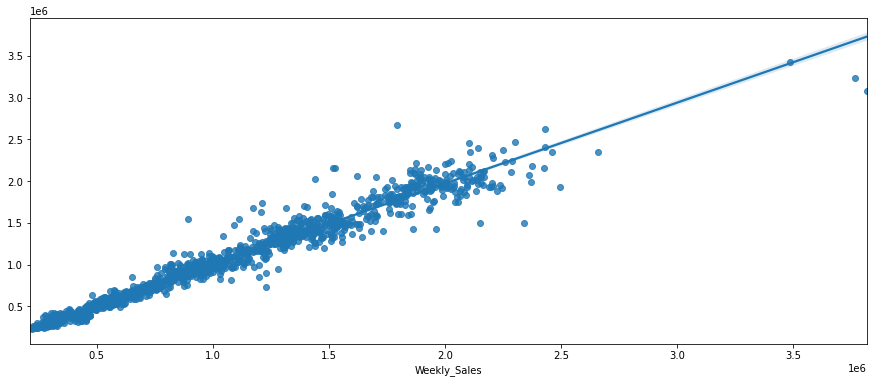

In [35]:
### Regression plot

plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_pred) 
plt.show()

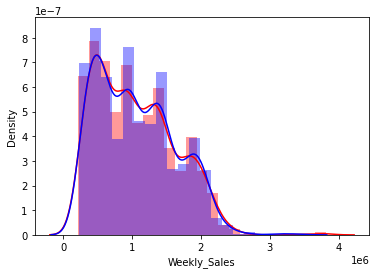

In [36]:
# Actual test values and model predicted test values

ax1 = sns.distplot(y_test,color='r',label='Actual Value')
sns.distplot(y_pred,color='b',label='RF predicted value',ax=ax1)
plt.show()